In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2)

In [3]:
# Preprocessing the Train set
training_set=train_datagen.flow_from_directory('D:/anaconda3/Machine_Learning/FlipRobo/Projects/Image Scraping and Classification Project/Train',
                                              target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical')


# Preprocessing the Test set
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('D:/anaconda3/Machine_Learning/FlipRobo/Projects/Image Scraping and Classification Project/Test',
                                                 target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical') 

Found 996 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


In [4]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step-1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',input_shape=[64,64,3]))

# Step-2 Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [6]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
32/32 [==============================] - 6s 169ms/step - loss: 0.9420 - accuracy: 0.5662 - val_loss: 0.4772 - val_accuracy: 0.7361
Epoch 2/15
32/32 [==============================] - 4s 129ms/step - loss: 0.4142 - accuracy: 0.7999 - val_loss: 0.2918 - val_accuracy: 0.8750
Epoch 3/15
32/32 [==============================] - 6s 192ms/step - loss: 0.3370 - accuracy: 0.8523 - val_loss: 0.2515 - val_accuracy: 0.8935
Epoch 4/15
32/32 [==============================] - 7s 215ms/step - loss: 0.3205 - accuracy: 0.8697 - val_loss: 0.2791 - val_accuracy: 0.8796
Epoch 5/15
32/32 [==============================] - 7s 217ms/step - loss: 0.3066 - accuracy: 0.8608 - val_loss: 0.2676 - val_accuracy: 0.8843
Epoch 6/15
32/32 [==============================] - 7s 211ms/step - loss: 0.2569 - accuracy: 0.8807 - val_loss: 0.2336 - val_accuracy: 0.9028
Epoch 7/15
32/32 [==============================] - 7s 214ms/step - loss: 0.2751 - accuracy: 0.8902 - val_loss: 0.2194 - val_accuracy: 0.8981
Epoch 

In [7]:
cnn.history.history

{'loss': [0.7376900315284729,
  0.4122890830039978,
  0.32380253076553345,
  0.32363882660865784,
  0.30926281213760376,
  0.2732604146003723,
  0.28154295682907104,
  0.2614935636520386,
  0.2759959101676941,
  0.2525629699230194,
  0.23137299716472626,
  0.2415844053030014,
  0.2099042385816574,
  0.2186637669801712,
  0.1947387456893921],
 'accuracy': [0.6475903391838074,
  0.8082329034805298,
  0.858433723449707,
  0.8594377636909485,
  0.8604417443275452,
  0.8724899888038635,
  0.8845381736755371,
  0.8835341334342957,
  0.891566276550293,
  0.8965863585472107,
  0.8935742974281311,
  0.8985943794250488,
  0.9116466045379639,
  0.9056224822998047,
  0.9166666865348816],
 'val_loss': [0.4772151708602905,
  0.291754812002182,
  0.25148215889930725,
  0.2791193425655365,
  0.2675796449184418,
  0.23358453810214996,
  0.2194141298532486,
  0.18895761668682098,
  0.2708404064178467,
  0.1635059416294098,
  0.20426100492477417,
  0.16769620776176453,
  0.14472883939743042,
  0.13878296

In [8]:
losses = pd.DataFrame(cnn.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.737690,0.647590,0.477215,0.736111
1,0.412289,0.808233,0.291755,0.875000
2,0.323803,0.858434,0.251482,0.893519
3,0.323639,0.859438,0.279119,0.879630
4,0.309263,0.860442,0.267580,0.884259
5,0.273260,0.872490,0.233585,0.902778
6,0.281543,0.884538,0.219414,0.898148
7,0.261494,0.883534,0.188958,0.907407
8,0.275996,0.891566,0.270840,0.870370
9,0.252563,0.896586,0.163506,0.925926


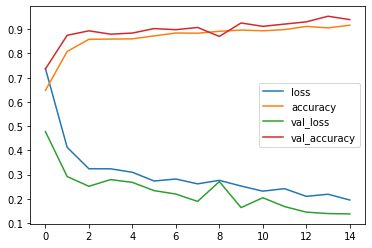

In [9]:
losses.plot()

In [10]:
# Save the model
cnn.save('image_classification.h5')

In [11]:
# Part 4 - Making a single prediction
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model('image_classification.h5')
test_image = image.load_img('D:/anaconda3/Machine_Learning/FlipRobo/Projects/Image Scraping and Classification Project/Test/Sarees/Img_27.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [12]:
class_names=['Jeans','Sarees','Trousers']
class_names[np.argmax(result[0])]

'Sarees'

In [13]:
test_image = image.load_img('D:/anaconda3/Machine_Learning/FlipRobo/Projects/Image Scraping and Classification Project/Test/Jeans/Img_53.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
class_names[np.argmax(result[0])]

'Jeans'

In [14]:
test_image = image.load_img('D:/anaconda3/Machine_Learning/FlipRobo/Projects/Image Scraping and Classification Project/Test/Trousers/Img_55.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
class_names[np.argmax(result[0])]

'Trousers'